# Fichier: LECTURE ET ANALYSE DES CLUSTERS EN STOCK
### Importation des librairies

In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline
from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km
from utils import k_shape as ks

2.5.1


### Initialise la factory et créé les instances de Support de Series: ss.SeriesSupp

In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)
store_path = "cluster\\13_06\\"

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


### Importation des datasets depuis les fichiers de stockage csv

In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


### Création des instances de Clustering
Commenter ou décommenter pour choisir le cluster_GW voulu selon Kshape ou Kmean
* GW: Grand Water -> les piezomètres
* RG: Rain gauge -> les pluviomètres

In [4]:
#cluster_GW = km.Kmean(GW)
cluster_GW = ks.Kshape(GW)
cluster_RG = km.Kmean(RG24)

## Importation du fichier Pickles contenant le clustering voulu
### Veuillez renseigner le nom du fichier ci dessous

In [5]:
name_file = "kmean_GW_[2015]_allmonths_w_10"

In [6]:
cluster_GW.read_cluster(store_path, name_file)

#### Parametres du plot
Année et mois

In [7]:
#years, months = [2014], [1]

#cluster_GW.ss.years = years
#cluster_GW.ss.months = months

#cluster_RG.ss.years = years
#cluster_RG.ss.months = months

#cluster_GW.ss.split_data_years()
#cluster_GW.ss.split_data_months()
#cluster_GW.ss.split_data_weeks()

#cluster_RG.ss.split_data_years()
#cluster_RG.ss.split_data_months()
#cluster_RG.ss.split_data_weeks()

#### Plot RG

In [8]:
#cluster_RG.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

#### Plot GW

In [9]:
#cluster_GW.ploter.change_mode(3)
#cluster_GW.ploter.plot_scatter(cluster_GW.ss.tmp_dataset)

## Affichage des cluster
* Prototypes en rouge
* informations en dessous
* repartition des objets dans les cluster

In [ ]:
cluster_GW.ploter.plot_cluster_light()
cluster_GW.show_info()
cluster_GW.cluster_counter()
cluster_GW.counter

In [11]:
cluster_GW.capteur_parser()
cluster_GW.ploter.change_mode(3)
#cluster_GW.cluster_by_fullname

## Analyse: n_obs est le numero du cluster à observer

In [ ]:
n_obs = 0
#cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[n_obs])
#cluster_GW.ploter.plot_histo(n_obs)
#cluster_GW.clust_hoverview(n_obs)

# Affichage des données GW a parametrer plus haut
#cluster_GW.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.dataset)

In [13]:
#cluster_RG.ss.reset_dataset()
#cluster_RG.ss.years = [2013, 2014, 2015]

In [14]:
#cluster_RG.ss.split_data_years()
#cluster_RG.ss.split_data_months()
#cluster_RG.ss.split_data_weeks()

In [15]:
#cluster_RG = km.Kmean(RG24)
#cluster_RG.ploter.plot_scatter_by_capteur(cluster_RG.ss.dataset, ["24h_RG007", "24h_RG017"])

In [16]:
#for k, v in cluster_GW.ss.dataset.items():
#    print(k)

## Recherche et test sur le SAX

In [17]:
from prefixspan import PrefixSpan
from utils import sax_engine as sq
from utils import prefix_span as ps

In [33]:
se = sq.SaxEngine(8, 50)

In [77]:
se.reset()

In [78]:
se.set_nb_symbol(5)
se.set_nb_segment(40)

In [79]:
all_ts = cluster_GW.get_cluster_n(n_obs)

In [91]:
se.fit(all_ts)
se.run()

In [81]:
psm = ps.PrefixSpanManager(se)

In [82]:
psm.run()

In [83]:
psm.topk(5)

[(105, [0]), (105, [1]), (105, [1, 0]), (105, [1, 1]), (104, [1, 2])]

In [92]:
n = 25

In [93]:
traw = psm.se_instance.raw_data[n]
traw.shape

(80, 1)

In [94]:
tinv = psm.se_instance.sax_data_inv[n]
tstr = psm.se_instance.sax_data[n]
tinv.shape

(1, 80, 1)

In [95]:
#tinv

In [96]:
#len(psm.se_instance.sax_data_inv)
#len(psm.se_instance.sax_data)
#len(psm.se_instance.raw_data)
#len(tinv.ravel())
#len(tstr.ravel())
#len(traw)

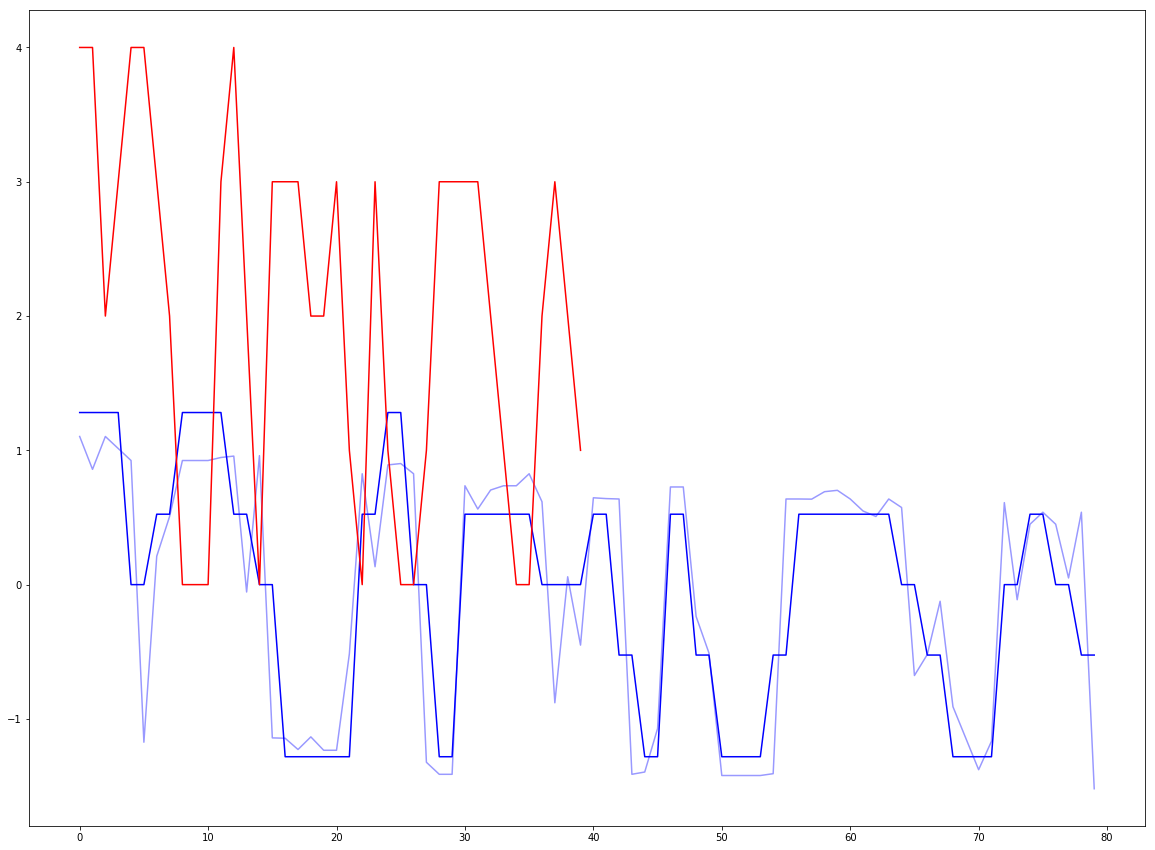

In [97]:
plt.plot(traw.ravel(), "b-", alpha=0.4)
plt.plot(tinv.ravel(), "b-")
plt.plot(tstr.ravel(), "r-")